In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
unrate = pd.read_csv("unrate.csv")
unrate["DATE"] = pd.to_datetime(unrate["DATE"])

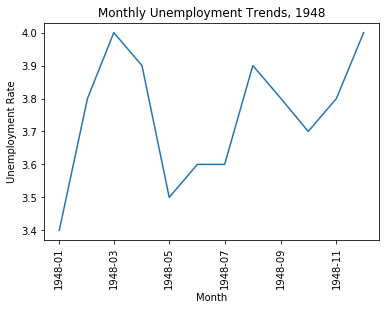

In [18]:
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show()

When we were working with a single plot, `pyplot` was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the `matplotlib` classes that `pyplot` uses internally to maintain state so we can interact with them directly

 What `pyplot` was automatically storing under the hood when we create a single plot:

* a container for all plots was created (returned as a `Figure` object)
* a container for the plot was positioned on a grid (the plot returned as an `Axes` object)
* visual symbols were added to the plot (using the `Axes` methods)

A `figure` acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall **width** and **height** of the plotting area and the spacing between plots.


We can manually create a figure by calling `pyplot.figure()`:

`fig = plt.figure()`

Instead of only calling the `pyplot` function, we assigned its return value to a variable (`fig`). After a `figure `is created, an axes for a single plot containing no data is created within the context of the `figure`.

While plots are represented using instances of the `Axes` class, they're also often referred to as **subplots** in **matplotlib**. To add a new subplot to an existing figure, use `Figure.add_subplot`. This will return a new `Axes` object, which needs to be assigned to a variable

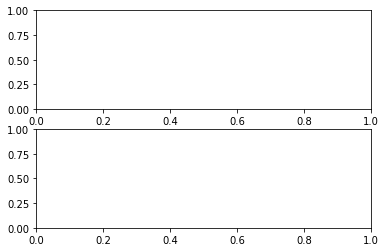

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1) # subplot
ax2 = fig.add_subplot(2,1,2)
plt.show()

For each subplot, `matplotlib` generated a coordinate grid that was similar to the one we generated in the last file using the `plot()` function:

* the x-axis and y-axis values ranging from 0.0 to 1.0
* no gridlines
* no data

The main difference is that this plot ranged from 0.0 to 1.0 instead of from -0.06 to 0.06

If we created a grid of 4 subplots but don't create a subplot for each position in the grid, areas without axes are left blank:

To generate a **line chart** within an Axes object, we need to call `Axes.plot()` and pass in the data to be plotted:

`x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)`

the `Axes.plot()` will accept any iterable object for these parameters, including `NumPy` arrays and `pandas` Series objects.

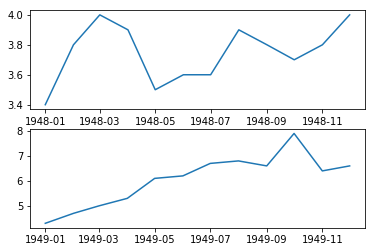

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate["DATE"].head(12),unrate["VALUE"].head(12))
ax2.plot(unrate["DATE"][12:24], unrate["VALUE"][12:24])
plt.show()

Even though now we generated 2 line charts, the total plotting area for the figure remained the same

This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure.

`fig = plt.figure(figsize=(width, height))`

The unit for both width and height values are in **inches**. The `dpi` parameter, or `dots per inch`, and the figsize parameter determine how much space on display a plot takes up. By increasing the `width` and the `height` of the plotting area, we can address both issues.

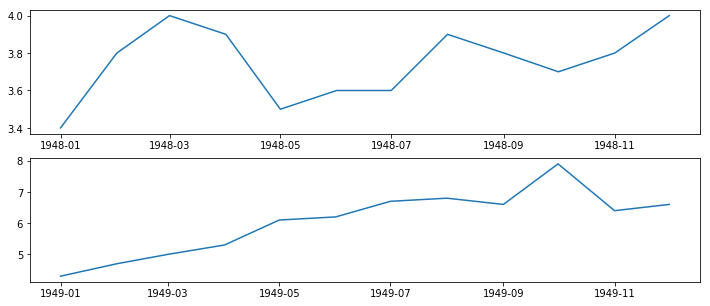

In [23]:
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate["DATE"].head(12),unrate["VALUE"].head(12))
ax2.plot(unrate["DATE"][12:24], unrate["VALUE"][12:24])
plt.show()

Visually analyzing both line charts, we'll discover that there's no changes in unemployment trends that are occurring in the same month in both years

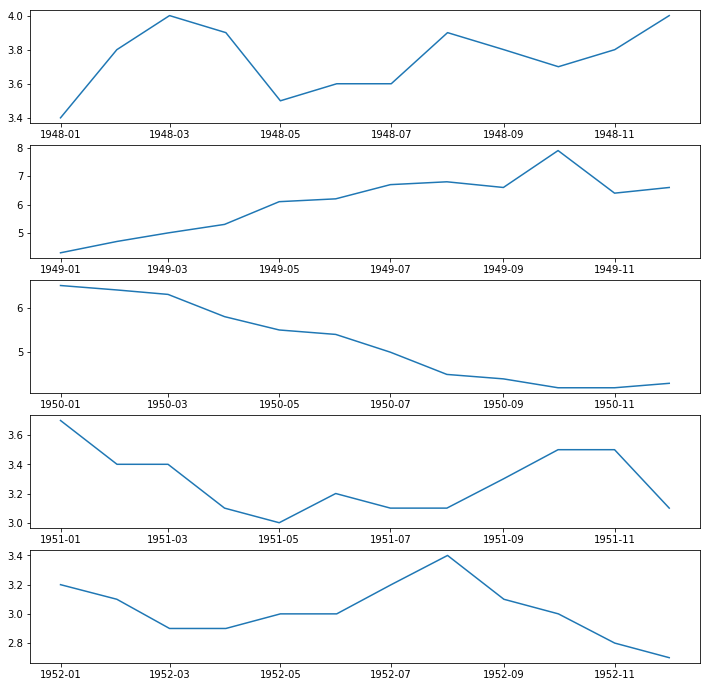

In [28]:
fig = plt.figure(figsize = (12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = 12*i
    end_index = 12*(i+1)
    ax.plot(unrate["DATE"][start_index:end_index],
            unrate["VALUE"][start_index:end_index])
plt.show()

We now have to visually scan over more space, which is a limitation that we experienced when scanning the table representation of the same data.

If we remove the `year` from the x-axis and just keep the `month` values, we can use the same x-axis values to plot all of the lines.

When we call `pyplot.plot()` to generate a single line chart, Under the hood, matplotlib created a `figure` and a `single subplot` for this line chart. If we call `pyplot.plot()` multiple times, matplotlib will generate the line charts on the single subplot.

If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data.

By default, matplotlib will select a different color for each line. To specify the color ourselves, use the **c** parameter when calling `plot()`

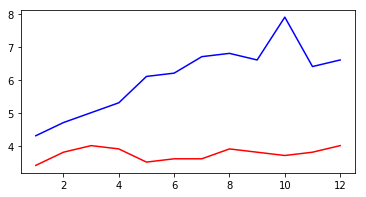

In [32]:
unrate["MONTH"] = unrate["DATE"].dt.month

fig = plt.figure(figsize = (6,3))
plt.plot(unrate["MONTH"].head(12), unrate["VALUE"].head(12), c = "red")
plt.plot(unrate["MONTH"][12:24], unrate["VALUE"][12:24], c = "blue")
plt.show()

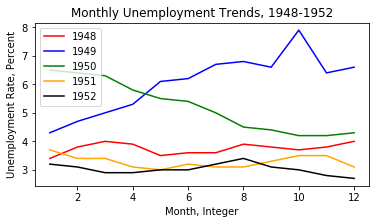

In [44]:
fig = plt.figure(figsize = (6,3))
colors = ["red","blue","green","orange", "black"]

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    labels = 1948+i
    plt.plot(unrate["MONTH"][start_index:end_index], 
             unrate["VALUE"][start_index:end_index], 
             c = colors[i], label = labels)
plt.legend(loc = "upper left")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.show()

The legend unfortunately covers part of the green line (which represents data from 1950). Since the legend isn't critical to the plot, we should move this outside of the coordinate grid

If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use `plt.plot()` and `plt.legend()`, the `Axes.plot()` and `Axes.legend()`